<a href="https://colab.research.google.com/github/pankaj18/hello_world/blob/master/rahul/rahul_error_homo_lumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Homo_Lumo_gap-3.xlsx to Homo_Lumo_gap-3.xlsx
User uploaded file "Homo_Lumo_gap-3.xlsx" with length 20847 bytes


In [13]:
data=pd.read_excel('Homo_Lumo_gap-3.xlsx')

In [106]:
data.tail(40)

,"Thia[n]helicenes, n=1-10",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
43,number of rings (n),Thia[n]helicene,Seleno[n]helicene,Telluro[n]helicene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,1,10.56,10.4,9.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2,9.92,9.66,8.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,3,9.57,9.41,8.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,4,9.35,9.09,8.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,5,9.25,8.92,8.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,6,9.22,8.84,8.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,7,9.2,8.75,7.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,8,9.17,8.69,7.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,9,9.12,8.62,7.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
columns=list(data.iloc[0,1:17])
columns

['BLYP',
 'B3LYP',
 'B3LYP-D',
 'B3LYP-D3',
 'PBE0',
 'LC-BLYP',
 'MN15',
 '#M06',
 '#CAM-B3LYP',
 '#ωB97XD',
 '#LC-ωPBE',
 '#LC-BLYP',
 '$LC-BLYP',
 'HF',
 'MP2',
 'CCSD']

In [18]:
data_thia=data.iloc[1:5,1:17]
data_thia.columns=columns
data_thia.reset_index(drop=True)

,BLYP,B3LYP,B3LYP-D,B3LYP-D3,PBE0,LC-BLYP,MN15,#M06,#CAM-B3LYP,#ωB97XD,#LC-ωPBE,#LC-BLYP,$LC-BLYP,HF,MP2,CCSD
0,4.36,5.99,5.98,5.98593,8.35,10.64,7.72002,6.01,8.66,9.9,10.62,10.56,10.5618,10.24,9.99,10.09
1,3.96,5.49,5.48,5.48635,7.72,9.89,7.1165,5.55,8.07,9.29,9.97,9.92,9.92321,9.57,9.37,9.46
2,3.65,5.13,5.12,5.11875,7.28,9.6,6.72686,5.27,7.65,8.9,9.66,9.57,9.57139,9.2,9.02,9.11
3,3.44,4.87,4.86,4.86161,6.98,9.36,6.45204,5.06,7.35,8.59,9.44,9.35,9.34691,9.04,8.84,8.96


In [19]:
def calculate_errors(df):
  error_df=pd.DataFrame()
  for col in list(df.columns):
    error_df[col+'_error_m']=df[col]-df['CCSD']
  print(error_df)
  error_df_calc=pd.DataFrame()
  error_df_calc['mue']=error_df.abs().mean(axis=0).values
  #print("mue\n")
  #print(error_df_calc['mue'])
  error_df_calc['mse']=error_df.mean(axis=0).values
  #print('\n mse \n')
  #print( error_df_calc['mse'])
  error_df_calc['max_ue']=error_df.abs().max(axis=0).values
  #print('\n max_ue \n ')
  #print(error_df_calc['max_ue'])
  error_df_calc.index=list(df.columns)
  return error_df_calc

# Thia

In [21]:
columns[:-1]

['BLYP',
 'B3LYP',
 'B3LYP-D',
 'B3LYP-D3',
 'PBE0',
 'LC-BLYP',
 'MN15',
 '#M06',
 '#CAM-B3LYP',
 '#ωB97XD',
 '#LC-ωPBE',
 '#LC-BLYP',
 '$LC-BLYP',
 'HF',
 'MP2']

  BLYP_error_m B3LYP_error_m  ... MP2_error_m CCSD_error_m
1        -5.73          -4.1  ...        -0.1            0
2         -5.5         -3.97  ...       -0.09            0
3        -5.46         -3.98  ...       -0.09            0
4        -5.52         -4.09  ...       -0.12            0

[4 rows x 16 columns]
                 mue       mse    max_ue
BLYP        5.552500 -5.552500  5.730000
B3LYP       4.035000 -4.035000  4.100000
B3LYP-D     4.045000 -4.045000  4.110000
B3LYP-D3    4.041841 -4.041841  4.104072
PBE0        1.822500 -1.822500  1.980000
LC-BLYP     0.467500  0.467500  0.550000
MN15        2.401145 -2.401145  2.507960
#M06        3.932500 -3.932500  4.080000
#CAM-B3LYP  1.472500 -1.472500  1.610000
#ωB97XD     0.235000 -0.235000  0.370000
#LC-ωPBE    0.517500  0.517500  0.550000
#LC-BLYP    0.445000  0.445000  0.470000
$LC-BLYP    0.445836  0.445836  0.471834
HF          0.107500  0.107500  0.150000
MP2         0.100000 -0.100000  0.120000
CCSD        0.000000  0.00

<Figure size 432x288 with 0 Axes>

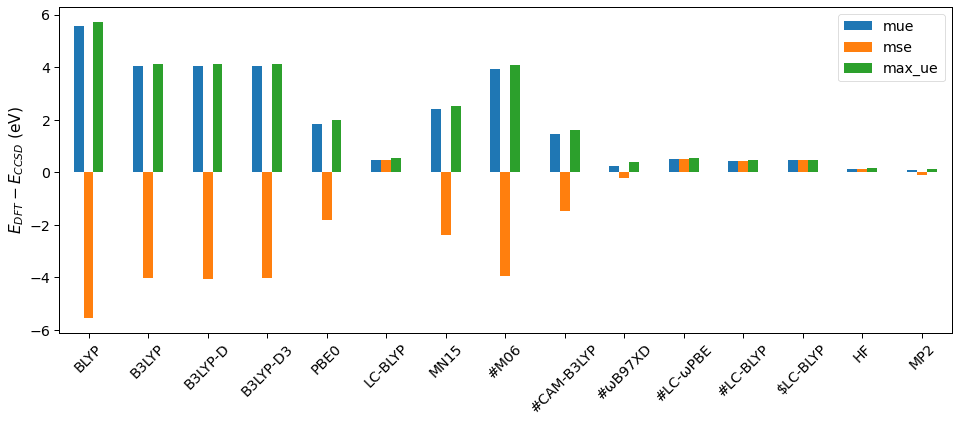

In [38]:
error_df_thia=calculate_errors(data_thia)
print(error_df_thia)
plt.figure()
sns.set_context('paper', font_scale=1.6)
error_df_thia.iloc[0:-1].plot.bar(rot=0,figsize=(16,6))
#plt.xlabel('')
plt.ylabel('$E_{DFT}-E_{CCSD}$ (eV)')
#plt.xlabel(columns[:-1],rotation=45)
plt.xticks(rotation=45) 
#plt.tight_layout()
plt.savefig('thia.jpg',dpi=300)

seleno

In [42]:
data_seleno=data.iloc[15:19,1:17]
data_seleno.columns=columns
data_seleno.reset_index(drop=True)

,BLYP,B3LYP,B3LYP-D,B3LYP-D3,PBE0,LC-BLYP,MN15,#M06,#CAM-B3LYP,#ωB97XD,#LC-ωPBE,#LC-BLYP,$LC-BLYP,HF,MP2,CCSD
0,4.19,5.79,5.78,5.78566,8.11,10.39,7.46316,5.94,8.45,9.66,10.46,10.4,10.3999,10.09,9.98,10.09
1,3.6,5.03,5.03,5.03195,7.15,9.62,6.56006,5.32,7.59,8.72,9.69,9.66,9.66363,9.37,9.29,9.35
2,3.34,4.74,4.73,4.73318,6.79,9.41,6.23544,5.03,7.2,8.38,9.33,9.41,9.41439,9.08,8.9,9
3,3.13,4.5,4.49,4.48856,6.5,9.18,5.97722,4.8,6.91,8.1,9,9.09,9.08923,8.89,8.71,8.83


   BLYP_error_m B3LYP_error_m  ... MP2_error_m CCSD_error_m
15         -5.9          -4.3  ...       -0.11            0
16        -5.75         -4.32  ...       -0.06            0
17        -5.66         -4.26  ...        -0.1            0
18         -5.7         -4.33  ...       -0.12            0

[4 rows x 16 columns]
                 mue       mse    max_ue
BLYP        5.752500 -5.752500  5.900000
B3LYP       4.302500 -4.302500  4.330000
B3LYP-D     4.310000 -4.310000  4.340000
B3LYP-D3    4.307663 -4.307663  4.341438
PBE0        2.180000 -2.180000  2.330000
LC-BLYP     0.332500  0.332500  0.410000
MN15        2.758530 -2.758530  2.852780
#M06        4.045000 -4.045000  4.150000
#CAM-B3LYP  1.780000 -1.780000  1.920000
#ωB97XD     0.602500 -0.602500  0.730000
#LC-ωPBE    0.302500  0.302500  0.370000
#LC-BLYP    0.322500  0.322500  0.410000
$LC-BLYP    0.324295  0.324295  0.414388
HF          0.040000  0.040000  0.080000
MP2         0.097500 -0.097500  0.120000
CCSD        0.000000 

<Figure size 432x288 with 0 Axes>

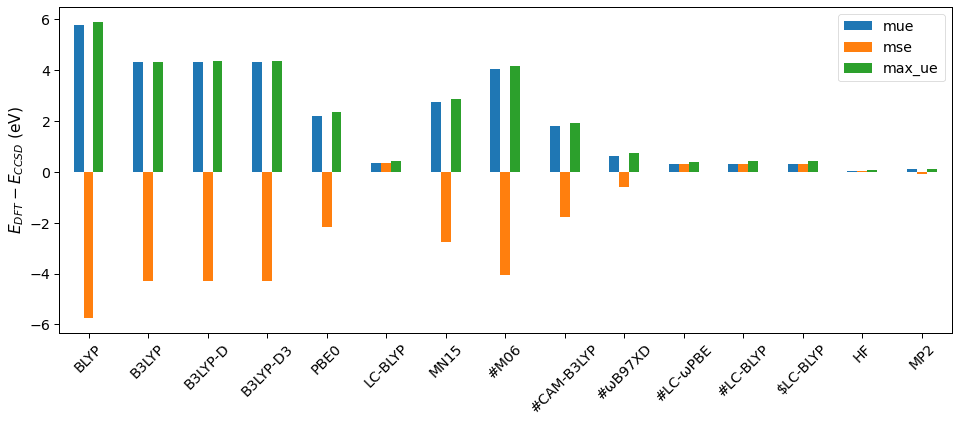

In [44]:
error_df_seleno=calculate_errors(data_seleno)
print(error_df_seleno)

plt.figure()
sns.set_context('paper', font_scale=1.6)
error_df_seleno.iloc[0:-1].plot.bar(rot=0,figsize=(16,6))
#plt.xlabel('')
plt.ylabel('$E_{DFT}-E_{CCSD}$ (eV)')
#plt.xlabel(columns[:-1],rotation=45)
plt.xticks(rotation=45) 
#plt.tight_layout()
plt.savefig('seleno.jpg',dpi=300)

telluro

In [47]:
data_telluro=data.iloc[29:32,1:17]
data_telluro.columns=columns
data_telluro.reset_index(drop=True)

,BLYP,B3LYP,B3LYP-D,B3LYP-D3,PBE0,LC-BLYP,MN15,#M06,#CAM-B3LYP,#ωB97XD,#LC-ωPBE,#LC-BLYP,$LC-BLYP,HF,MP2,CCSD
0,3.73,5.14,5.12,5.13099,7.22,9.66,6.5753,5.33,7.57,8.82,9.71,9.62,9.6239,9.44,9.53,9.49
1,2.85,4.21,4.21,4.21075,6.25,8.9,5.53996,4.55,6.65,7.87,8.89,8.84,8.84243,8.87,8.8,8.84
2,2.61,3.97,3.97,3.96477,5.99,8.66,5.26677,4.35,6.39,7.62,8.65,8.58,8.5853,8.74,8.6,8.66


   BLYP_error_m B3LYP_error_m  ... MP2_error_m CCSD_error_m
29        -5.76         -4.35  ...        0.04            0
30        -5.99         -4.63  ...       -0.04            0
31        -6.05         -4.69  ...       -0.06            0

[3 rows x 16 columns]
                 mue       mse    max_ue
BLYP        5.933333 -5.933333  6.050000
B3LYP       4.556667 -4.556667  4.690000
B3LYP-D     4.563333 -4.563333  4.690000
B3LYP-D3    4.561165 -4.561165  4.695231
PBE0        2.510000 -2.510000  2.670000
LC-BLYP     0.076667  0.076667  0.170000
MN15        3.202657 -3.202657  3.393230
#M06        4.253333 -4.253333  4.310000
#CAM-B3LYP  2.126667 -2.126667  2.270000
#ωB97XD     0.893333 -0.893333  1.040000
#LC-ωPBE    0.093333  0.086667  0.220000
#LC-BLYP    0.070000  0.016667  0.130000
$LC-BLYP    0.070346  0.020546  0.133905
HF          0.053333  0.020000  0.080000
MP2         0.046667 -0.020000  0.060000
CCSD        0.000000  0.000000  0.000000


<Figure size 432x288 with 0 Axes>

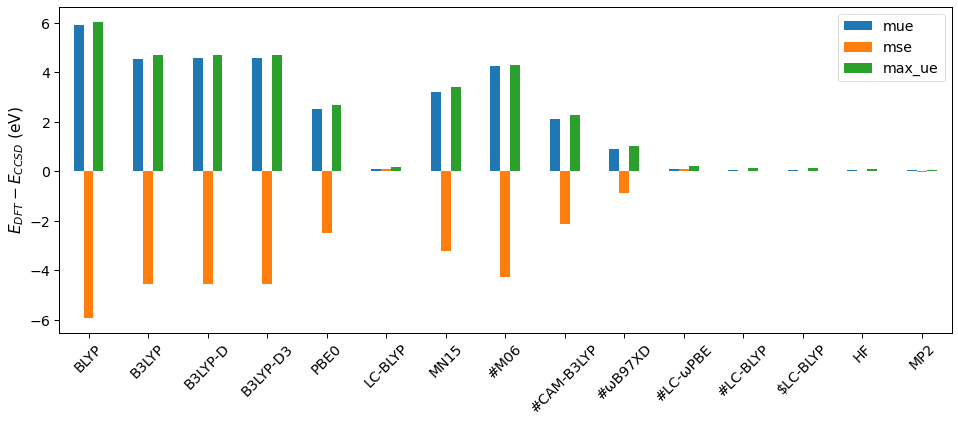

In [48]:
error_df_telluro=calculate_errors(data_telluro)
print(error_df_telluro)

plt.figure()
sns.set_context('paper', font_scale=1.6)
error_df_telluro.iloc[0:-1].plot.bar(rot=0,figsize=(16,6))
#plt.xlabel('')
plt.ylabel('$E_{DFT}-E_{CCSD}$ (eV)')
#plt.xlabel(columns[:-1],rotation=45)
plt.xticks(rotation=45) 
#plt.tight_layout()
plt.savefig('telluro.jpg',dpi=300)

Homo Lumo gap

In [51]:
columns=list(data.iloc[0,0:17])
columns

['number of rings (n)',
 'BLYP',
 'B3LYP',
 'B3LYP-D',
 'B3LYP-D3',
 'PBE0',
 'LC-BLYP',
 'MN15',
 '#M06',
 '#CAM-B3LYP',
 '#ωB97XD',
 '#LC-ωPBE',
 '#LC-BLYP',
 '$LC-BLYP',
 'HF',
 'MP2',
 'CCSD']

In [56]:
columns[0]

'number of rings (n)'

In [74]:
def plot_scatter(df,columns):
  plt.figure(figsize=(14,6))
  
  plt.scatter(df[columns[0]],df[columns[1]],marker="s",label=columns[1])
  plt.scatter(df[columns[0]],df[columns[2]],marker="8",label=columns[2])
  plt.scatter(df[columns[0]],df[columns[3]],marker="p",label=columns[3])
  plt.scatter(df[columns[0]],df[columns[4]],marker="P",label=columns[4])
  plt.scatter(df[columns[0]],df[columns[5]],marker="*",label=columns[5])
  plt.scatter(df[columns[0]],df[columns[6]],marker="h",label=columns[6])
  plt.scatter(df[columns[0]],df[columns[7]],marker="+",label=columns[7])
  plt.scatter(df[columns[0]],df[columns[8]],marker="x",label=columns[8])
  plt.scatter(df[columns[0]],df[columns[9]],marker="d",label=columns[9])
  plt.scatter(df[columns[0]],df[columns[10]],marker="o",label=columns[10])
  plt.scatter(df[columns[0]],df[columns[11]],marker="v",label=columns[11])
  plt.scatter(df[columns[0]],df[columns[12]],marker="^",label=columns[12])
  plt.scatter(df[columns[0]],df[columns[13]],marker="<",label=columns[13])
  plt.scatter(df[columns[0]],df[columns[14]],marker=">",label=columns[14])
  plt.scatter(df[columns[0]],df[columns[15]],marker="D",label=columns[15])
  plt.scatter(df[columns[0]],df[columns[16]],marker="H",label=columns[16])
  plt.legend(bbox_to_anchor = ( 1.0, 1))
  plt.xticks(np.arange(1,11,step=1))
  plt.yticks(np.arange(0,14,step=2))
  plt.xlabel('number of rings (n)')
  plt.ylabel('HOMO-LUMO gap (eV)')
  sns.set_context('paper', font_scale=1.6)


In [75]:
data_thia=data.iloc[1:11,0:17]
data_thia.columns=columns
data_thia.reset_index(drop=True)

,number of rings (n),BLYP,B3LYP,B3LYP-D,B3LYP-D3,PBE0,LC-BLYP,MN15,#M06,#CAM-B3LYP,#ωB97XD,#LC-ωPBE,#LC-BLYP,$LC-BLYP,HF,MP2,CCSD
0,1,4.36,5.99,5.98,5.98593,8.35,10.64,7.72002,6.01,8.66,9.9,10.62,10.56,10.5618,10.24,9.99,10.09
1,2,3.96,5.49,5.48,5.48635,7.72,9.89,7.1165,5.55,8.07,9.29,9.97,9.92,9.92321,9.57,9.37,9.46
2,3,3.65,5.13,5.12,5.11875,7.28,9.6,6.72686,5.27,7.65,8.9,9.66,9.57,9.57139,9.2,9.02,9.11
3,4,3.44,4.87,4.86,4.86161,6.98,9.36,6.45204,5.06,7.35,8.59,9.44,9.35,9.34691,9.04,8.84,8.96
4,5,3.3,4.71,4.71,4.70624,6.79,9.24,6.27272,4.96,7.18,8.41,9.34,9.25,9.2495,8.97,8.77,NaN
5,6,3.22,4.62,4.62,4.61346,6.68,9.22,6.1734,4.93,7.08,8.31,9.25,9.22,9.22419,8.95,8.72,NaN
6,7,3.13,4.53,4.52,4.52121,6.58,9.2,6.07436,4.9,6.98,8.2,9.13,9.2,9.19154,8.96,8.76,NaN
7,8,3.05,4.49,4.85,4.48475,6.55,9.29,6.03681,4.82,6.94,8.15,9.09,9.17,9.17222,9.1,8.87,NaN
8,9,3,4.43,4.45,4.45292,6.51,9.25,6.01695,4.77,6.89,8.09,9.05,9.12,9.13113,9.16,8.9,NaN
9,10,2.98,4.4,4.41,4.41129,6.47,9.21,5.92307,4.73,6.84,8.05,8.99,9.07,9.06311,9.15,8.84,NaN


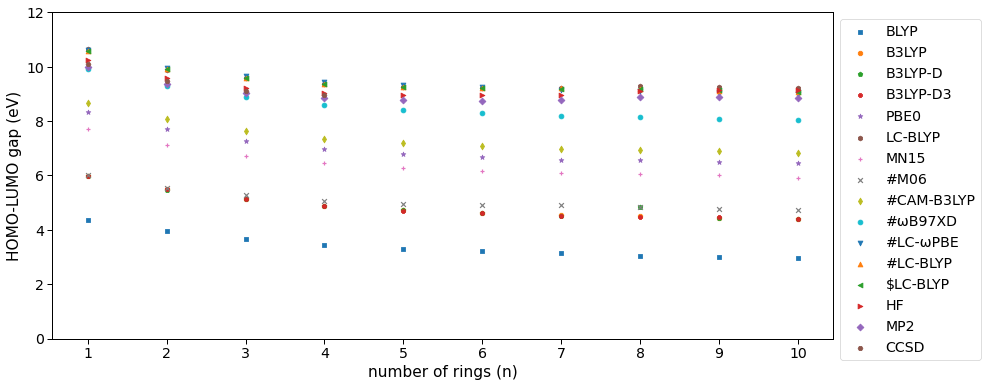

In [81]:
plot_scatter(data_thia,columns)
plt.savefig('data_thia_scatter.jpg',dpi=300)

In [79]:
data_seleno=data.iloc[15:25,0:17]
data_seleno.columns=columns
data_seleno.reset_index(drop=True)

,number of rings (n),BLYP,B3LYP,B3LYP-D,B3LYP-D3,PBE0,LC-BLYP,MN15,#M06,#CAM-B3LYP,#ωB97XD,#LC-ωPBE,#LC-BLYP,$LC-BLYP,HF,MP2,CCSD
0,1,4.19,5.79,5.78,5.78566,8.11,10.39,7.46316,5.94,8.45,9.66,10.46,10.4,10.3999,10.09,9.98,10.09
1,2,3.6,5.03,5.03,5.03195,7.15,9.62,6.56006,5.32,7.59,8.72,9.69,9.66,9.66363,9.37,9.29,9.35
2,3,3.34,4.74,4.73,4.73318,6.79,9.41,6.23544,5.03,7.2,8.38,9.33,9.41,9.41439,9.08,8.9,9
3,4,3.13,4.5,4.49,4.48856,6.5,9.18,5.97722,4.8,6.91,8.1,9,9.09,9.08923,8.89,8.71,8.83
4,5,2.99,4.34,4.33,4.33047,6.31,9,5.79246,4.63,6.74,7.92,8.82,8.92,8.91481,8.82,8.62,NaN
5,6,2.88,4.24,4.23,4.23197,6.22,8.93,5.69424,4.55,6.65,7.82,8.74,8.84,8.83645,8.85,8.63,NaN
6,7,2.76,4.16,4.13,4.14463,6.13,8.85,5.61696,4.45,6.56,7.73,8.64,8.75,8.75318,8.88,8.65,NaN
7,8,2.69,4.09,4.09,4.10082,6.09,8.81,5.59193,4.37,6.49,7.65,8.58,8.69,8.68815,8.9,8.64,NaN
8,9,2.68,4.06,4.05,4.05892,6.02,8.72,5.48091,4.34,6.44,7.6,8.51,8.62,8.58856,8.84,8.53,NaN
9,10,2.64,4,3.96,3.97593,5.93,8.64,5.36146,4.23,6.37,7.53,8.44,8.54,8.48816,8.74,8.38,NaN


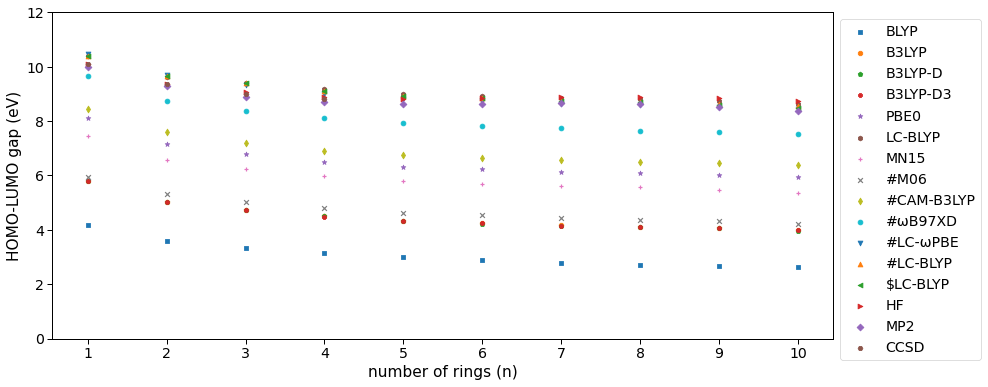

In [82]:
plot_scatter(data_seleno,columns)
plt.savefig('data_seleno_scatter.jpg',dpi=300)

In [84]:
data_telluro=data.iloc[29:39,0:17]
data_telluro.columns=columns
data_telluro.reset_index(drop=True)

,number of rings (n),BLYP,B3LYP,B3LYP-D,B3LYP-D3,PBE0,LC-BLYP,MN15,#M06,#CAM-B3LYP,#ωB97XD,#LC-ωPBE,#LC-BLYP,$LC-BLYP,HF,MP2,CCSD
0,1,3.73,5.14,5.12,5.13099,7.22,9.66,6.5753,5.33,7.57,8.82,9.71,9.62,9.6239,9.44,9.53,9.49
1,2,2.85,4.21,4.21,4.21075,6.25,8.9,5.53996,4.55,6.65,7.87,8.89,8.84,8.84243,8.87,8.8,8.84
2,3,2.61,3.97,3.97,3.96477,5.99,8.66,5.26677,4.35,6.39,7.62,8.65,8.58,8.5853,8.74,8.6,8.66
3,4,2.36,3.7,3.7,3.69702,5.7,8.37,4.99222,4.1,6.1,7.33,8.36,8.28,8.27538,8.54,8.39,NaN
4,5,2.22,3.56,3.57,3.56342,5.55,8.23,4.84256,3.96,5.95,7.17,8.21,8.13,8.13987,8.5,8.29,NaN
5,6,2.11,3.44,3.46,3.45377,5.43,8.12,4.72148,3.86,5.83,7.04,8.09,8.01,8.02913,8.44,8.25,NaN
6,7,2.03,3.36,3.37,3.36343,5.33,8.01,4.60339,3.78,5.75,6.96,7.99,7.92,7.91376,8.35,8.06,NaN
7,8,1.92,3.22,3.2,3.20724,5.16,7.84,4.48258,3.64,5.59,6.8,7.83,7.76,7.73553,8.19,7.92,NaN
8,9,1.87,3.17,3.12,3.12942,5.08,7.77,4.39496,3.59,5.53,6.74,7.77,7.69,7.64057,8.11,7.59,NaN
9,10,1.81,3.12,3.19,3.0984,5.04,7.72,4.36204,3.54,5.48,6.68,7.71,7.63,7.60111,8.04,7.65,NaN


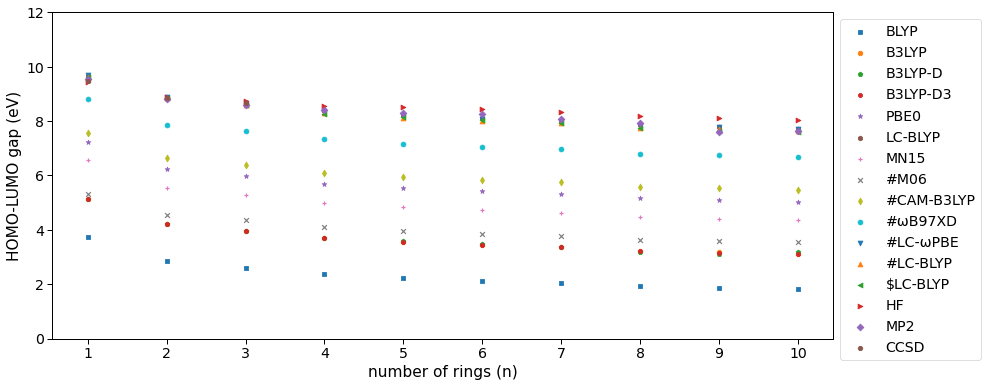

In [85]:
plot_scatter(data_telluro,columns)
plt.savefig('data_telluro_scatter.jpg',dpi=300)

helicene

In [90]:
cols=list(data.iloc[43,0:4])
cols

['number of rings (n)',
 'Thia[n]helicene',
 'Seleno[n]helicene',
 'Telluro[n]helicene']

In [119]:
data_helicene1=data.iloc[44:54,0:4]
data_helicene1.columns=cols
data_helicene1=data_helicene1.reset_index(drop=True)
print(data_helicene1)

  number of rings (n) Thia[n]helicene Seleno[n]helicene Telluro[n]helicene
0                   1           10.56              10.4               9.62
1                   2            9.92              9.66               8.84
2                   3            9.57              9.41               8.58
3                   4            9.35              9.09               8.28
4                   5            9.25              8.92               8.13
5                   6            9.22              8.84               8.01
6                   7             9.2              8.75               7.92
7                   8            9.17              8.69               7.76
8                   9            9.12              8.62               7.69
9                  10            9.07              8.54               7.63


In [120]:
def plot_scatter1(df,columns):
  plt.figure(figsize=(14,6))
  sns.set_context('paper', font_scale=1.6)
  plt.scatter(df[cols[0]],df[columns[1]],marker="s",label=columns[1])
  plt.scatter(df[cols[0]],df[columns[2]],marker="8",label=columns[2])
  plt.scatter(df[cols[0]],df[columns[3]],marker="p",label=columns[3])
  plt.plot(df[cols[0]],df[columns[1]])
  plt.plot(df[cols[0]],df[columns[2]])
  plt.plot(df[cols[0]],df[columns[3]])
  plt.legend(bbox_to_anchor = ( 1.0, 1.0))
  plt.xticks(np.arange(1,11,step=1))
  plt.yticks(np.arange(6,14,step=2))
  plt.xlabel('number of rings (n)')
  plt.ylabel('HOMO-LUMO gap (eV)')

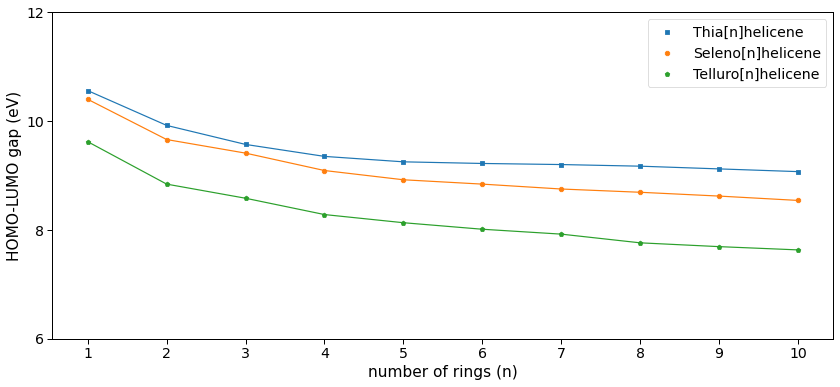

In [104]:
plot_scatter1(data_helicene1,cols)
plt.savefig('data_helicene1.jpg',dpi=300)

  number of rings (n) Thia[n]helicene Seleno[n]helicene Telluro[n]helicene
0                   1         10.5618           10.3999             9.6239
1                   2         9.92321           9.66363            8.84243
2                   3         9.57139           9.41439             8.5853
3                   4         9.34691           9.08923            8.27538
4                   5          9.2495           8.91481            8.13987
5                   6         9.22419           8.83645            8.02913
6                   7         9.19154           8.75318            7.91376
7                   8         9.17222           8.68815            7.73553
8                   9         9.13113           8.58856            7.64057
9                  10         9.06311           8.48816            7.60111


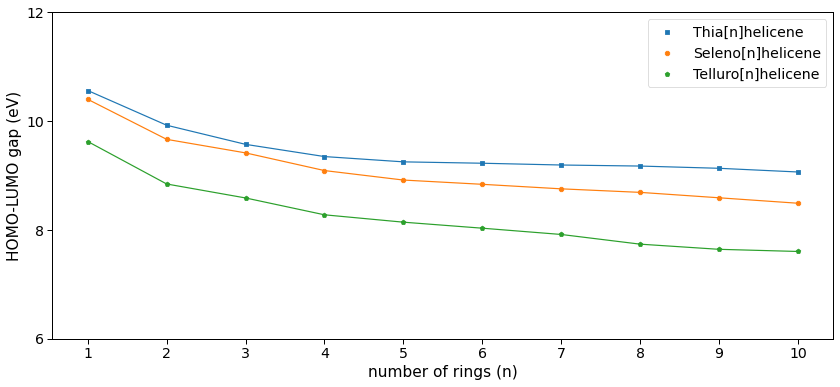

In [118]:
data_helicene2=data.iloc[58:68,0:4]
data_helicene2.columns=cols
data_helicene2=data_helicene2.reset_index(drop=True)
print(data_helicene2)

plot_scatter1(data_helicene2,cols)
plt.savefig('data_helicene2.jpg',dpi=300)

  number of rings (n) Thia[n]helicene Seleno[n]helicene Telluro[n]helicene
0                   1           10.64             10.39               9.66
1                   2            9.89              9.62                8.9
2                   3             9.6              9.41               8.66
3                   4            9.36              9.18               8.37
4                   5            9.24                 9               8.23
5                   6            9.22              8.93               8.12
6                   7             9.2              8.85               8.01
7                   8            9.29              8.81               7.84
8                   9            9.25              8.72               7.77
9                  10            9.21              8.64               7.72


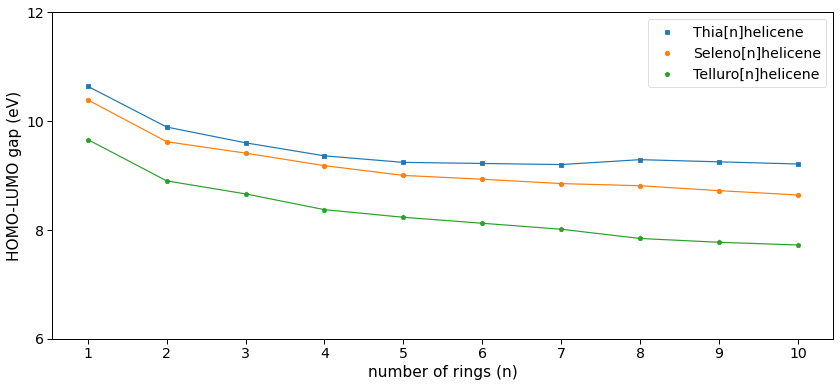

In [117]:
data_helicene3=data.iloc[73:83,0:4]
data_helicene3.columns=cols
data_helicene3=data_helicene3.reset_index(drop=True)
print(data_helicene3)
plot_scatter1(data_helicene3,cols)
plt.savefig('data_helicene3.jpg',dpi=300)